In [1]:
# project: p11
# submitter: Kmconrad3
# partner: Akroubal
# hours: 7

In [2]:
import os, json, csv

import pandas as pd

from collections import namedtuple

In [3]:
def format_likes(like):
    if str(like).lower().find('k')>-1:
        like=like[:-1]
        return float(like)*1000
    elif str(like).lower().find('m')>-1:
        like=like[:-1]
        return float(like)*1000000
    else:
        return like

def scatter(x, y, xlabel="please label me!", ylabel="please label me!"):
    df = pd.DataFrame({"x":x, "y":y})
    ax = df.plot.scatter(x="x", y="y", color="black", fontsize=16, xlim=0, ylim=0)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)

In [4]:
def process_csv(filename):
    exampleFile = open(filename, encoding="utf-8")
    exampleReader = csv.reader(exampleFile)
    exampleData = list(exampleReader)
    exampleFile.close()
    return exampleData

def presenttweets(filename):
    Tweet = namedtuple("Tweet",['tweet_id', 'username', 'num_liked', 'length'])
    tweets = []
    for item in range(len(process_csv(filename))):
        if item == 0:
            continue
        try:
            tweets.append(Tweet((process_csv(filename)[item][0]),(process_csv(filename)[item][2]), int(process_csv(filename)[item][3]), ((len(process_csv(filename)[item][4])))))
        except:
            continue
    return tweets

In [5]:
def process_json(filename):
    exampleFile = open(filename, encoding='utf-8')
    data=json.load(exampleFile)
    exampleFile.close()
    return dict(data)

def presenttweetsjson(filename):
    Tweet = namedtuple("Tweet",['tweet_id', 'username', 'num_liked', 'length'])
    tweetz = []
    try:
        json_dict=process_json(filename)
    except:
        return tweetz
    for item in json_dict:
        if json_dict[item]['num_liked']=='unkown' or json_dict[item]['num_liked']=='unknown':
            json_dict[item]['num_liked']=0
        json_dict[item]['num_liked']=format_likes(json_dict[item]['num_liked'])
        try:
            tweetz.append(Tweet(item,json_dict[item]['username'], int(json_dict[item]['num_liked']), len(json_dict[item]['tweet_text'])))
        except:
            continue
    return tweetz

fulllist = (presenttweets('full_data/1.csv') + presenttweets('full_data/2.csv') + presenttweets('full_data/3.csv') + presenttweets('full_data/4.csv') + presenttweets('full_data/5.csv') + presenttweetsjson('full_data/1.json') + presenttweetsjson('full_data/2.json') + presenttweetsjson('full_data/3.json') + presenttweetsjson('full_data/4.json') + presenttweetsjson('full_data/5.json'))

In [6]:
#q1
uniquetweets = {}
for i in range(len(fulllist)):
    if fulllist[i][3] not in uniquetweets:
        uniquetweets[fulllist[i][3]] = 0 
    uniquetweets[fulllist[i][3]]+=1
len(uniquetweets)

131

In [7]:
#q2
usernames = {}
for i in range(len(fulllist)):
    if fulllist[i][1] not in usernames:
        usernames[fulllist[i][1]] = 0 
    usernames[fulllist[i][1]]+=1
set(usernames)

{'USERID_1',
 'USERID_10',
 'USERID_2',
 'USERID_3',
 'USERID_4',
 'USERID_5',
 'USERID_6',
 'USERID_7',
 'USERID_8',
 'USERID_9'}

In [8]:
#q3
usernames

{'USERID_9': 44,
 'USERID_3': 39,
 'USERID_4': 35,
 'USERID_8': 31,
 'USERID_2': 47,
 'USERID_10': 45,
 'USERID_1': 52,
 'USERID_7': 55,
 'USERID_6': 51,
 'USERID_5': 46}

In [9]:
#q4
usernames = {}
longestlengthtweets = {}
for i in range(len(fulllist)):
    if fulllist[i][1] not in usernames:
        usernames[fulllist[i][1]] = 0
        longestlengthtweets[fulllist[i][1]] = fulllist[i][3]
    if fulllist[i][1] in longestlengthtweets and fulllist[i][3] > longestlengthtweets[fulllist[i][1]]:
        longestlengthtweets[fulllist[i][1]] = fulllist[i][3] 
    usernames[fulllist[i][1]]+=1
longestlengthtweets

{'USERID_9': 137,
 'USERID_3': 138,
 'USERID_4': 138,
 'USERID_8': 145,
 'USERID_2': 138,
 'USERID_10': 136,
 'USERID_1': 150,
 'USERID_7': 144,
 'USERID_6': 145,
 'USERID_5': 146}

In [10]:
#q5
usernames = {}
largestlikes = {}
for i in range(len(fulllist)):
    if fulllist[i][1] not in usernames:
        usernames[fulllist[i][1]] = 0
        largestlikes[fulllist[i][1]] = fulllist[i][2]
    if fulllist[i][1] in largestlikes and fulllist[i][2] > largestlikes[fulllist[i][1]]:
        largestlikes[fulllist[i][1]] = fulllist[i][2] 
    usernames[fulllist[i][1]]+=1
largestlikes

{'USERID_9': 9728,
 'USERID_3': 9678,
 'USERID_4': 9618,
 'USERID_8': 915000,
 'USERID_2': 869000000,
 'USERID_10': 9936,
 'USERID_1': 9393,
 'USERID_7': 9851,
 'USERID_6': 9149,
 'USERID_5': 9608}

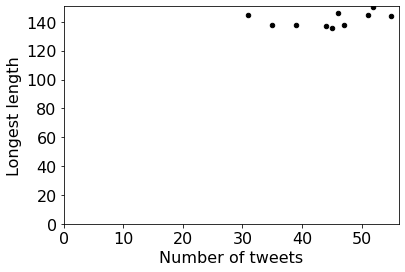

In [11]:
#q6
scatter(list(usernames.values()), list(longestlengthtweets.values()), xlabel = 'Number of tweets', ylabel = 'Longest length')

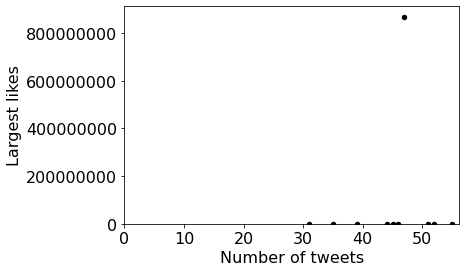

In [12]:
#q7
scatter(list(usernames.values()), list(largestlikes.values()), xlabel = 'Number of tweets', ylabel = 'Largest likes')

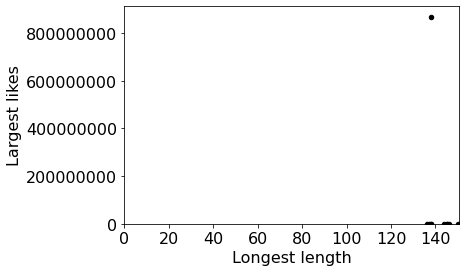

In [13]:
#q8
scatter(list(longestlengthtweets.values()), list(largestlikes.values()), xlabel = 'Longest length', ylabel = "Largest likes")

In [14]:
#q9
totallikes = 0
outlier = None
for i in range(len(list(largestlikes.values()))):
    totallikes += list(largestlikes.values())[i] 
avglikes = (totallikes)/len(list(largestlikes.values()))
for i in range(len(list(largestlikes.values()))):
    if list(largestlikes.values())[i] > avglikes:
        outlier = (list(largestlikes.values())[i])

(list(largestlikes.keys())[list(largestlikes.values()).index((outlier))])

'USERID_2'

In [15]:
#q10
def presenttweets2(username):
    Tweet = namedtuple("Tweet",['tweet_id', 'username', 'num_liked', 'length'])
    tweets = []
    for item in range(len(fulllist)):
        if (fulllist[item][1]) == username:
            tweets.append(Tweet((fulllist[item][0]),(fulllist[item][1]), int(fulllist[item][2]), ((fulllist[item][3]))))
    return tweets

tweetsss = presenttweets2('USERID_2')
sorted(tweetsss, key = lambda thing : thing[-2], reverse = True)

[Tweet(tweet_id='1467894593', username='USERID_2', num_liked=869000000, length=136),
 Tweet(tweet_id='1467875163', username='USERID_2', num_liked=9891, length=69),
 Tweet(tweet_id='1467862806', username='USERID_2', num_liked=9465, length=68),
 Tweet(tweet_id='1467907751', username='USERID_2', num_liked=9048, length=110),
 Tweet(tweet_id='1467928764', username='USERID_2', num_liked=9026, length=41),
 Tweet(tweet_id='1467943007', username='USERID_2', num_liked=9000, length=130),
 Tweet(tweet_id='1467918682', username='USERID_2', num_liked=8884, length=102),
 Tweet(tweet_id='1467935121', username='USERID_2', num_liked=8740, length=37),
 Tweet(tweet_id='1467947913', username='USERID_2', num_liked=8578, length=36),
 Tweet(tweet_id='1467892667', username='USERID_2', num_liked=8270, length=20),
 Tweet(tweet_id='1467897316', username='USERID_2', num_liked=7890, length=64),
 Tweet(tweet_id='1467854917', username='USERID_2', num_liked=7741, length=30),
 Tweet(tweet_id='1467961106', username='USE

In [16]:
#q11
avg_tweet=0
for tweet in sorted(tweetsss, key = lambda thing : thing[-2], reverse = True)[1:] :
    avg_tweet+=tweet[2]
    
round(avg_tweet/len(sorted(tweetsss, key = lambda thing : thing[-2], reverse = True)[1:]),2)

5003.57

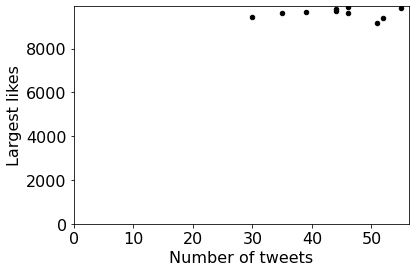

In [17]:
#q12
def plot_special_likes(idxfront=0,idxback=None):
    usernamez = {}
    largestlikes={}
    usernames={}
    if idxback==None:
        alterlist=sorted(fulllist, key = lambda thing : thing[-2], reverse = True)[idxfront:]
    else:
        alterlist=sorted(fulllist, key = lambda thing : thing[-2], reverse = True)[idxfront:idxback]
        
    for i in range(len(alterlist)):
        if alterlist[i][1] not in usernamez:
            usernamez[alterlist[i][1]] = 0 
        usernamez[alterlist[i][1]]+=1
    
    for i in range(len(alterlist)):
        if alterlist[i][1] not in usernames:
            usernames[alterlist[i][1]] = 0
            largestlikes[alterlist[i][1]] = alterlist[i][2]
        if alterlist[i][1] in largestlikes and alterlist[i][2] > largestlikes[alterlist[i][1]]:
            largestlikes[alterlist[i][1]] = alterlist[i][2] 
        usernames[alterlist[i][1]]+=1

    scatter(list(usernamez.values()), list(largestlikes.values()), xlabel = 'Number of tweets', ylabel = 'Largest likes')

plot_special_likes(idxfront=3)    

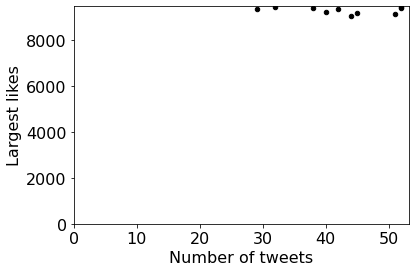

In [18]:
#q13
plot_special_likes(idxfront=20)    

In [19]:
#q14

def thefiles(directory):
    listofpaths = []
    for file in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, file))==True: 
            if file[0]!='.':
                listofpaths.append(os.path.join(directory, file))
        if os.path.isdir(os.path.join(directory, file))==True:
            listofpaths=listofpaths+(thefiles(os.path.join(directory, file)))
    return sorted(listofpaths)
    
thefiles('play/rb')

['play/rb/ppt.ppt', 'play/rb/rb9/12.xls', 'play/rb/rb9/89.csv']

In [20]:
#q15
thefiles('play/ls/qwe')

['play/ls/qwe/iuqwe.json', 'play/ls/qwe/usun.pdf']

In [21]:
#q16
thefiles('play')

['play/ls/lu.txt',
 'play/ls/mf.py',
 'play/ls/qwe/iuqwe.json',
 'play/ls/qwe/usun.pdf',
 'play/ou/a',
 'play/ou/b',
 'play/ou/quap/aoq/aqnsa',
 'play/ou/quap/aoq/qsonj',
 'play/ou/quap/qonxu.txt',
 'play/ou/quap/uikwe',
 'play/ou/v',
 'play/rb/ppt.ppt',
 'play/rb/rb9/12.xls',
 'play/rb/rb9/89.csv']

In [22]:
#q17
thefiles('recursive/others')

['recursive/others/USERID_10.json',
 'recursive/others/USERID_5.json',
 'recursive/others/USERID_6.json',
 'recursive/others/USERID_7.json',
 'recursive/others/USERID_8.json',
 'recursive/others/USERID_9.json']

In [23]:
#q18
thefiles('recursive')

['recursive/USERID_1/tweets.json',
 'recursive/USERID_2/tweets.json',
 'recursive/USERID_3/tweets.json',
 'recursive/USERID_4/1.csv',
 'recursive/USERID_4/1.json',
 'recursive/USERID_4/2.csv',
 'recursive/USERID_4/2.json',
 'recursive/USERID_4/false/tweets.json',
 'recursive/USERID_4/true/tweets.json',
 'recursive/others/USERID_10.json',
 'recursive/others/USERID_5.json',
 'recursive/others/USERID_6.json',
 'recursive/others/USERID_7.json',
 'recursive/others/USERID_8.json',
 'recursive/others/USERID_9.json']

In [24]:
#q19
def tweetfilecount(paths):
    tweets=0
    for file in paths:
        if file.find('json')>-1:
            tweets+=len(presenttweetsjson(file))
        if file.find('csv')>-1:
            tweets+=len(presenttweets(file))
    return tweets

tweetfilecount(thefiles('recursive/USERID_4'))

37

In [25]:
#q20
tweetfilecount(thefiles('recursive'))

220